<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
{'learning_rate': 0.0002515105221560693, 'hidden_size': 5, 'weight_decay': 0.1926347958653213}
RSS: -1.4975059032440186
TSS: -1.4975059032440186
R2: -1.4975059032440186
RSS: -1.551185131072998
TSS: -1.551185131072998
R2: -1.551185131072998
RSS: -1.859239101409912
TSS: -1.859239101409912
R2: -1.859239101409912
RSS: -1.5090785026550293
TSS: -1.5090785026550293
R2: -1.5090785026550293
RSS: -0.731012225151062
TSS: -0.731012225151062
R2: -0.731012225151062
RSS: -0.9805847406387329
TSS: -0.9805847406387329
R2: -0.9805847406387329
232229.76171875 -8.128605604171753
RSS: -0.884774923324585
TSS: -0.884774923324585
R2: -0.884774923324585
RSS: -0.22561407089233398
TSS: -0.22561407089233398
R2: -0.22561407089233398
RSS: -0.23088538646697998
TSS: -0.23088538646697998
R2: -0.23088538646697998
RSS: -1.0915710926055908
TSS: -1.0915710926055908
R2: -1.0915710926055908
RSS: -0.22765564918518066
TSS: -0.22765564918518066
R2: -0.227

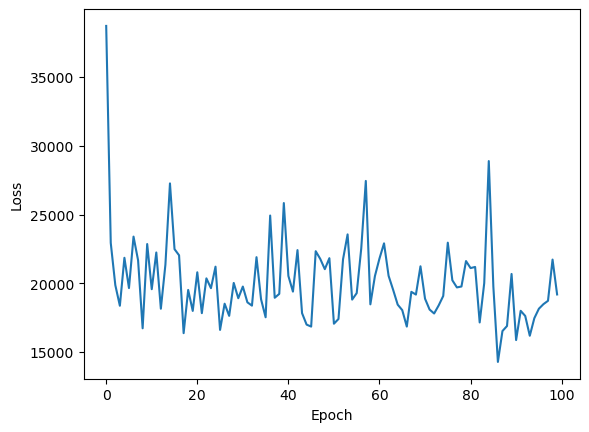

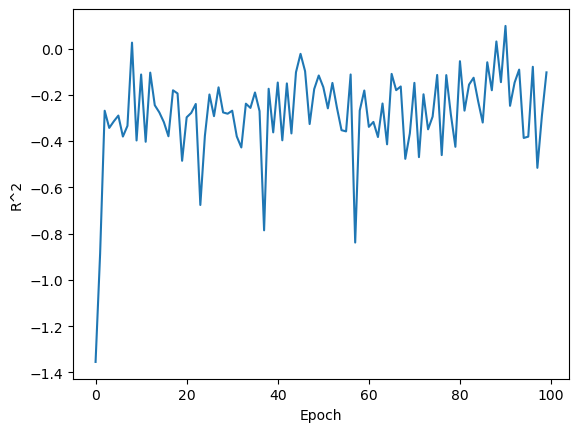

['bathrooms', 'guests', 'beds']
[313.99740459460924, 263.7775110750494, 170.05109215677655]


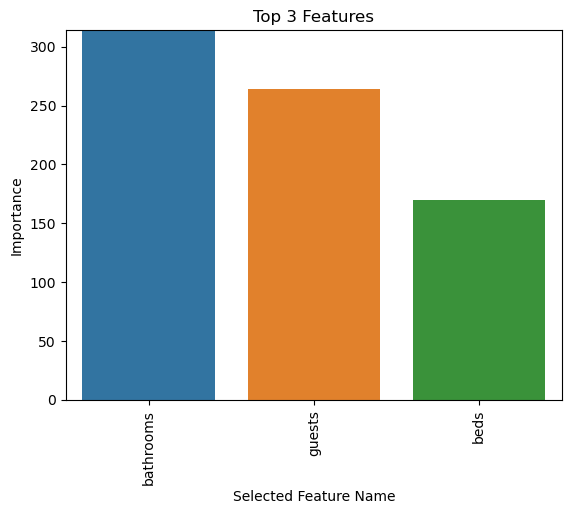

-2.29522705078125
{'learning_rate': 9.64537399326531e-05, 'hidden_size': 4, 'weight_decay': 0.8897771759778492}
RSS: -1.5635480880737305
TSS: -1.5635480880737305
R2: -1.5635480880737305
RSS: -1.0162160396575928
TSS: -1.0162160396575928
R2: -1.0162160396575928
RSS: -2.410475492477417
TSS: -2.410475492477417
R2: -2.410475492477417
RSS: -1.3745393753051758
TSS: -1.3745393753051758
R2: -1.3745393753051758
RSS: -1.3786883354187012
TSS: -1.3786883354187012
R2: -1.3786883354187012
RSS: -2.0736637115478516
TSS: -2.0736637115478516
R2: -2.0736637115478516
243175.7734375 -9.817131042480469
RSS: -2.0334784984588623
TSS: -2.0334784984588623
R2: -2.0334784984588623
RSS: -1.1918737888336182
TSS: -1.1918737888336182
R2: -1.1918737888336182
RSS: -1.0853641033172607
TSS: -1.0853641033172607
R2: -1.0853641033172607
RSS: -0.942740797996521
TSS: -0.942740797996521
R2: -0.942740797996521
RSS: -1.187568187713623
TSS: -1.187568187713623
R2: -1.187568187713623
RSS: -3.560433864593506
TSS: -3.560433864593506
R

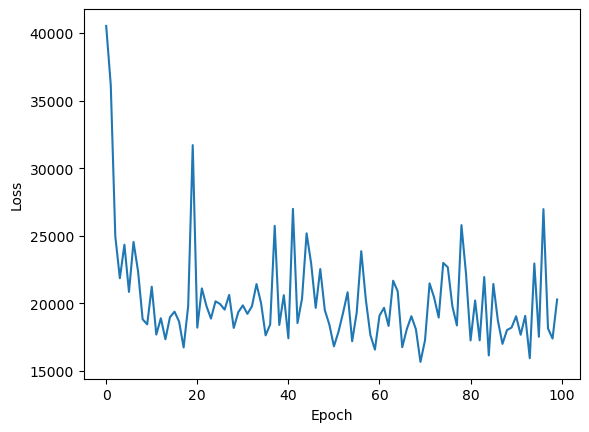

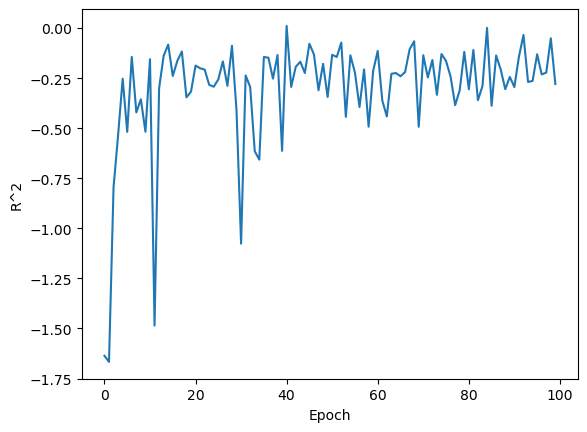

['bathrooms', 'guests', 'beds']
[313.99740459460924, 263.7775110750494, 170.05109215677655]


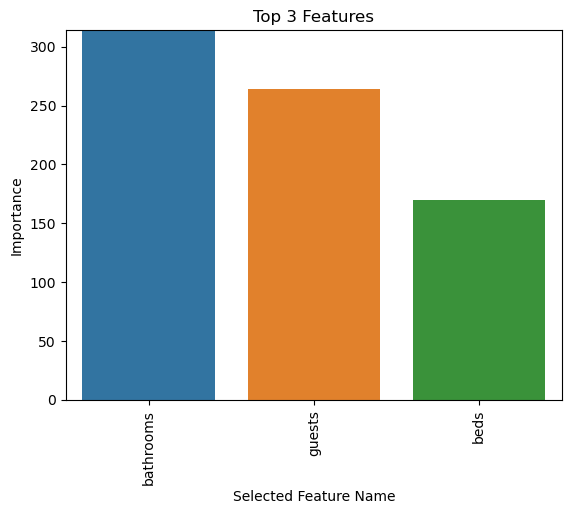

-0.3830230236053467
{'learning_rate': 0.000710817285942954, 'hidden_size': 4, 'weight_decay': 0.20617168954267695}
RSS: -1.9694454669952393
TSS: -1.9694454669952393
R2: -1.9694454669952393
RSS: -1.236393690109253
TSS: -1.236393690109253
R2: -1.236393690109253
RSS: -1.2122514247894287
TSS: -1.2122514247894287
R2: -1.2122514247894287
RSS: -1.2927649021148682
TSS: -1.2927649021148682
R2: -1.2927649021148682
RSS: -0.7440804243087769
TSS: -0.7440804243087769
R2: -0.7440804243087769
RSS: -1.037235975265503
TSS: -1.037235975265503
R2: -1.037235975265503
247885.625 -7.492171883583069
RSS: -1.1274795532226562
TSS: -1.1274795532226562
R2: -1.1274795532226562
RSS: -0.39322662353515625
TSS: -0.39322662353515625
R2: -0.39322662353515625
RSS: -0.4532628059387207
TSS: -0.4532628059387207
R2: -0.4532628059387207
RSS: -3.329683780670166
TSS: -3.329683780670166
R2: -3.329683780670166
RSS: -1.1485271453857422
TSS: -1.1485271453857422
R2: -1.1485271453857422
RSS: -3.8611979484558105
TSS: -3.86119794845581

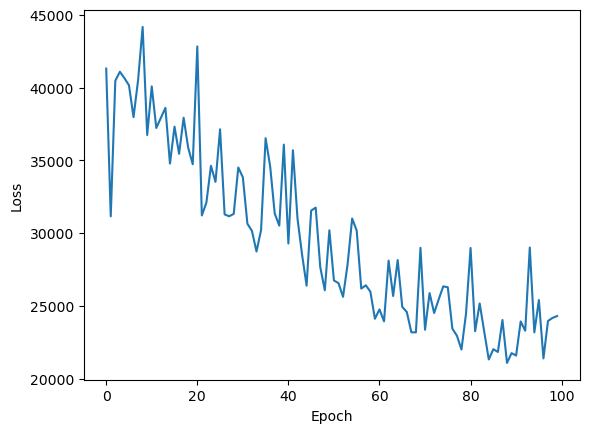

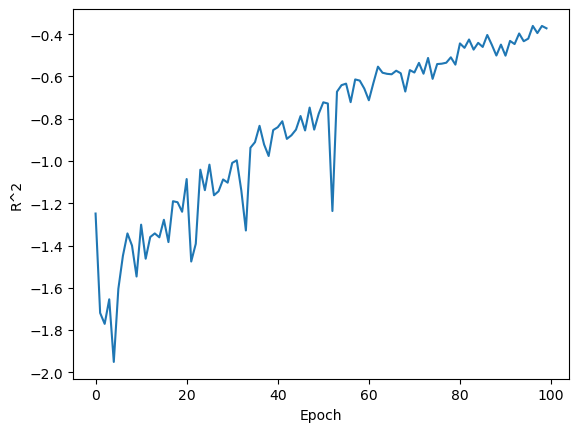

['bathrooms', 'guests', 'beds']
[313.99740459460924, 263.7775110750494, 170.05109215677655]


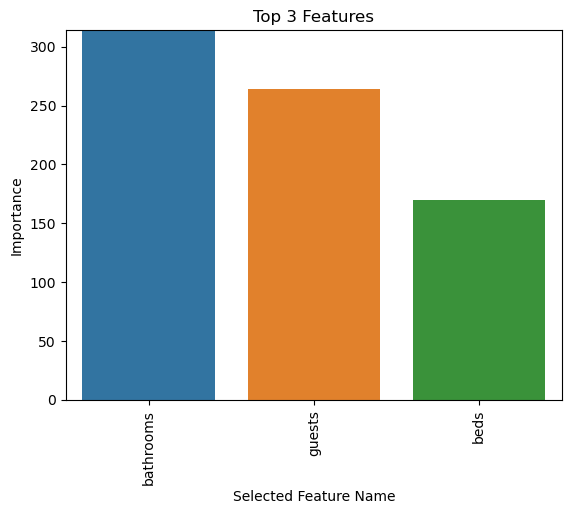

-0.5186306238174438
Best model:
  Loss:  23955.9658203125
  R^2:  -0.3830230236053467


In [60]:
import pandas as pd
import numpy as np
import torch
import time
import os
import json
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
from torch.utils.tensorboard import SummaryWriter
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import r2_score
from torchmetrics import R2Score
import torch.nn.functional as F


class PriceNightDataset(Dataset):
    """A PyTorch dataset class for representing a dataset of price and night data.

    Parameters:
    -----------
    X: [pd.DataFrame, torch.Tensor]
        The input data for the dataset. Can be either a Pandas DataFrame or a PyTorch tensor.
    y: [pd.DataFrame, torch.Tensor]
        The target data for the dataset. Can be either a Pandas DataFrame or a PyTorch tensor.
    transform_fn: Optional[Callable]
        A function that will be applied to the dataset during each iteration.

    Attributes:
    -----------
    X: torch.Tensor
        The input data for the dataset as a PyTorch tensor.
    y: torch.Tensor
        The target data for the dataset as a PyTorch tensor.
    transform_fn: Optional[Callable]
        A function that will be applied to the dataset during each iteration.
    """    
    
    def __init__(self, X, y, transform_fn):
        if isinstance(X, pd.DataFrame):
            self.X = torch.tensor(X.values).float()
            self.y = torch.tensor(y.values).float()
        else:
            self.X = torch.tensor(X).float()
            self.y = torch.tensor(y).float()    

        self.transform_fn = transform_fn

    def __len__(self):
        """Returns the length of the dataset.
        
        Returns:
        --------
        int
            The length of the dataset.
        """
        
        return len(self.X)


    def __getitem__(self, index):
        """Returns the data at the given index in the dataset.
        
        Parameters:
        -----------
        index: int
            The index of the data to be returned.
        
        Returns:
        --------
        Tuple[torch.Tensor, torch.Tensor]
            A tuple containing the input and target data at the given index.
        """

        if self.transform_fn:
            self.X, self.y = self.transform_fn.select_features(self.X, self.y)
            
        return self.X[index], self.y[index]

# Create the transformation function
class TransformFn:
    
    """A class for performing feature selection on a dataset.

    Parameters:
    -----------
    k: int
        The number of top features to select.

    Attributes:
    -----------
    top_k_scores_list: List[float]
        A list of the scores of the top k features selected by the feature selection process.
    top_k_names_list: List[str]
        A list of the names of the top k features selected by the feature selection process.
    k: int
        The number of top features to select.
    """

    def __init__(self,k):
        self.top_k_scores_list = []
        self.top_k_names_list = []
        self.k = k

    def select_features(self, features, labels):

        """Performs feature selection on the given dataset.

        Parameters:
        -----------
        features: np.ndarray
            The input features of the dataset.
        labels: np.ndarray
            The target labels of the dataset.

        Returns:
        --------
        Tuple[np.ndarray, np.ndarray]
            A tuple containing the selected features and labels.
        """

        # Create the SelectKBest object
        k = self.k
        selector = SelectKBest(k=k, score_func=f_regression)

        # Fit the selector to the features and labels
        selector.fit(features, labels) 

        # Select the k best features
        features_selected = selector.transform(features)
        # Access the indices of the selected features
        selected_feature_indices = selector.get_support(indices=True)
        
        # Get the feature scores and names
        scores = selector.scores_
        feature_names = list(X.columns)
        # Sort the features by their scores
        sorted_features = sorted(zip(scores, feature_names), reverse=True)

        # Extract the scores and names of the top k features
        self.top_k_scores_list = [score for score, _ in sorted_features[:k]]
        self.top_k_names_list = [name for _, name in sorted_features[:k]]
        
        return features_selected, labels

    def get_top_k_scores(self):

        """Returns the scores of the top k features selected by the feature selection process.

        Returns:
        --------
        List[float]
            The scores of the top k features.
        """

        return self.top_k_scores_list
    
    def get_top_k_names(self):

        """Returns the names of the top k features selected by the feature selection process.

        Returns:
        --------
        List[str]
            The names of the top k features.
        """

        return self.top_k_names_list

    def get_overall_top_k_scores(self):

        """Returns the scores and names of the top k features selected by the feature selection process across all iterations.

        Returns:
        --------
        Tuple[List[float], List[str]]
            A tuple containing the scores and names of the top k features.
        """

        # Concatenate the lists of top k scores and names
        top_k_scores = [score for scores in self.top_k_scores_list for score in scores]
        top_k_names = [name for names in self.top_k_names_list for name in names]
        
        # Zip the scores and names together and sort by scores in descending order
        sorted_features = sorted(zip(top_k_scores, top_k_names), reverse=True)
        
        # Extract the scores and names of the top k features
        top_k_scores = [score for score, _ in sorted_features[:self.k]]
        top_k_names = [name for _, name in sorted_features[:self.k]]
        
        return top_k_scores, top_k_names
    
    
    def plot_bar_chart(self, top_k_names, top_k_scores):
        """Plots a bar chart showing the importance of the top k features.

        Parameters:
        -----------
        top_k_names: List[str]
            The names of the top k features.
        top_k_scores: List[float]
            The scores of the top k features.
        """
        
        # Use seaborn to create a bar plot
        ax = sns.barplot(x=top_k_names, y=top_k_scores)
        
        # Rotate the x-axis labels
        plt.setp(ax.get_xticklabels(), rotation=90)
        
        # Set the title and axis labels
        plt.xlabel('Selected Feature Name')
        plt.ylabel('Importance')
        plt.title('Top {} Features'.format(self.k))
        plt.ylim(ymin=0, ymax=max(top_k_scores))
      
        plt.show()

def generate_nn_configs(num_configs):
    """Generate a list of config dictionaries for the neural network.

    Parameters:
    num_configs (int): The number of config dictionaries to generate.

    Returns:
    list: A list of config dictionaries.
    """
    configs = []
    for _ in range(num_configs):
        config = {
            'learning_rate': random.uniform(0.00001, 0.001),
            'hidden_size': random.randint(3,6),
            'weight_decay': random.uniform(0.001,1)
        }
        configs.append(config)
    return configs

def define_model(config,num_features_to_use):
    """Define a neural network model.

    Parameters:
    config (dict): A dictionary containing the hyperparameters for the model.

    Returns:
    torch model: The defined model.
    """
    model = torch.nn.Sequential(
        torch.nn.Linear(num_features_to_use, config['hidden_size']),  # 10 input features, hidden_size outputs
        torch.nn.ReLU(),
        torch.nn.Dropout(p=0.5),   # Dropout with a rate of 0.5
        torch.nn.Linear(config['hidden_size'], 1)  # hidden_size inputs, 1 output (prediction)
    )
    
    return model

def define_optimiser(model, config):
    """Define the optimiser for a model.

    Parameters:
    model (torch model): The model to optimise.
    config (dict): A dictionary containing the hyperparameters for the optimiser.

    Returns:
    torch optimiser: The defined optimiser.
    """
    optimiser = torch.optim.SGD(model.parameters(), lr=config['learning_rate'], weight_decay=config['weight_decay'])

    return optimiser

def define_loss_fn():
    """Define the loss function.

    Returns:
    torch loss function: The defined loss function.
    """
    loss_fn = torch.nn.MSELoss()

    return loss_fn

def train_epoch(model, optimiser, loss_fn, train_loader,num_features_to_use):
    """Train a model for one epoch.

    Parameters:
    model (torch model): The model to train.
    optimiser (torch optimiser): The optimiser to use.
    loss_fn (torch loss function): The loss function to use.
    train_loader (torch DataLoader): A DataLoader for the training set.

    Returns:
    float: The epoch loss.
    """
    # Initialize the loss for the epoch
    epoch_loss = 0
    epoch_r2=0
    # Train the model    
    for X_batch, y_batch in train_loader:
        X_batch = X_batch.reshape(-1,num_features_to_use)
        # Make predictions and compute the loss
        y_pred = model(X_batch)
        y_pred = y_pred.squeeze()
        loss = loss_fn(y_pred, y_batch)
        epoch_loss += loss.item()
        # Compute the R^2 value for the batch
        # y_pred = y_pred.detach().numpy()
        # y_batch = y_batch.detach().numpy()
        batch_r2 = R2Score(num_outputs=3, multioutput='raw_values',adjusted=3)
        # batch_r2=batch_r2(y_pred,y_batch)

        # Compute the R2 score
        rss, tss, r2 = batch_r2(y_pred,y_batch)

        # Print the individual components
        print(f"RSS: {rss}")
        print(f"TSS: {tss}")
        print(f"R2: {r2}")

        epoch_r2 += r2.item()
        # Backpropagate the gradients and update the model parameters
        optimiser.zero_grad()
        loss.backward()
        optimiser.step()

    return epoch_loss, epoch_r2

def train(X_train, y_train, config, train_loader,num_features_to_use):
    """Train a neural network model.

    Parameters:
    X_train (pandas DataFrame): The training input data.
    y_train (pandas Series): The training output data.
    config (dict): A dictionary containing the hyperparameters for the model.
    train_loader (torch DataLoader): A DataLoader for the training set.

    Returns:
    torch model: The trained model.
    """
    # Define the model
    model = define_model(config,num_features_to_use)

    # Define the optimiser
    optimiser = define_optimiser(model, config)

    # Define the loss function
    loss_fn = define_loss_fn()

    since = time.time()
    writer = SummaryWriter()

    # Initialize the loss and R^2 values for the epoch
    epoch_loss = 0
    epoch_r2 = 0
    epoch_losses = []
    epoch_r2s = []
    # Train the model for 100 epochs
    for i in range(100):
        # Train the model for one epoch
        epoch_loss, epoch_r2 = train_epoch(model, optimiser, loss_fn, train_loader,num_features_to_use)
        print(epoch_loss, epoch_r2)

        # Compute the average loss and R^2 value for the epoch
        epoch_loss /= len(train_loader)
        epoch_r2 /= len(train_loader)

        # Add the loss and R^2 values for the epoch to the lists
        epoch_losses.append(epoch_loss)
        epoch_r2s.append(epoch_r2)

        writer.add_scalar('Loss/train', epoch_loss, i)
        writer.add_scalar('R^2/train', epoch_r2, i)

        
    
    # Plot the loss and R^2 values for each epoch

    # Detach the epoch_losses and epoch_r2s values
    # epoch_losses = epoch_losses.detach().numpy()

    plt.plot(epoch_losses)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()

    plt.plot(epoch_r2s)
    plt.xlabel('Epoch')
    plt.ylabel('R^2')
    plt.show()    
    writer.close()
    return model


def evaluate(model, loss_fn, X_test_tensor, y_test_tensor, test_loader, num_features_to_use):
    """Evaluate a model on the test set.

    Parameters:
    model (torch model): The model to evaluate.
    loss_fn (torch loss function): The loss function to use for evaluation.
    X_test (pandas DataFrame): The test input data.
    y_test (pandas Series): The test output data.
    test_loader (torch DataLoader): A DataLoader for the test set.

    Returns:
    tuple: A tuple containing the model's loss and R^2 value on the test set.
    """
    # Initialize the loss and R^2 values for the test set
    test_loss = 0
    test_r2 = 0

    # Evaluate the model on the test set
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch = X_batch.reshape(-1,num_features_to_use)
            # Make predictions and compute the loss
            y_pred = model(X_batch)
            y_pred = y_pred.squeeze()
            loss = loss_fn(y_pred, y_batch)
            test_loss += loss.item()

            # Compute the R^2 value
            # y_pred = y_pred.numpy().flatten()
            # y_batch = y_batch.numpy().flatten()
            batch_r2 = R2Score()
            batch_r2= batch_r2( y_pred,y_batch)
            test_r2 += batch_r2.item()
        print(test_r2)
    
    return test_loss, test_r2

def main(X, y, num_features_to_use,number_of_configs_to_test):
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    if isinstance(X, pd.DataFrame):
        # Convert the training and test sets to tensors
        X_train_tensor = torch.tensor(X_train.values).float()
        y_train_tensor = torch.tensor(y_train.values).float().view(-1, 1)
        X_test_tensor = torch.tensor(X_test.values).float()
        y_test_tensor = torch.tensor(y_test.values).float().view(-1, 1)

    else:
        X_train_tensor = torch.tensor(X_train).float()
        y_train_tensor = torch.tensor(y_train).float().view(-1, 1)
        X_test_tensor = torch.tensor(X_test).float()
        y_test_tensor = torch.tensor(y_test).float().view(-1, 1)
  
    # Instantiate the TransformFn object
    transformer = TransformFn(num_features_to_use)

    # Deteremine batch size
    batch_size = 128

    # Create a dataset and data loader for the training set
    train_dataset = PriceNightDataset(X_train, y_train, transformer)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle= True)

    # Create a data loader for the test set
    test_dataset = PriceNightDataset(X_test, y_test,transformer)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle= False)
    
    # Generate a list of config dictionaries for the neural network
    nn_configs = generate_nn_configs(number_of_configs_to_test)

    # Initialize a list to store the models and their scores
    models_and_scores = []

    # Loss function defined

    loss_fn= define_loss_fn()

    # Train and evaluate each model
    for config in nn_configs:
        print(config)
        model = train(X_train, y_train, config, train_loader,num_features_to_use)
        # for eachh config, show the top 5 features that are consistently important
        top_k_names = transformer.get_top_k_names()
        top_k_scores =transformer.get_top_k_scores()
        print(top_k_names)
        print(top_k_scores)       
        transformer.plot_bar_chart(top_k_names, top_k_scores)

        # Evaluate and gather error values
        test_loss, test_r2 = evaluate(model, loss_fn, X_test_tensor, y_test_tensor, test_loader,num_features_to_use)
        models_and_scores.append((model, test_loss, test_r2, config))

    # Sort the models by their scores
    models_and_scores.sort(key=lambda x: x[2], reverse=True)

    # Print the results
    print('Best model:')
    print('  Loss: ', models_and_scores[0][1])
    print('  R^2: ', models_and_scores[0][2])

df = pd.read_csv('tabular_data/tabular_data/clean_tabular_data.csv')
X = df[["guests","beds","bathrooms","Cleanliness_rating","Accuracy_rating","Communication_rating","Location_rating","Check-in_rating","Value_rating","amenities_count"]] # get all columns except the last one
y = df['Price_Night']  # get the 'Price_Night' column
print(type(X))
print(type(y))
main(X,y,3,3)

{'learning_rate': 0.0005112585747425189, 'hidden_size': 5, 'weight_decay': 0.10454098735415979}
RSS: -4.482955455780029
TSS: -4.482955455780029
R2: -4.482955455780029
RSS: -3.573946952819824
TSS: -3.573946952819824
R2: -3.573946952819824
RSS: -4.672199249267578
TSS: -4.672199249267578
R2: -4.672199249267578
88123.61328125 -12.729101657867432
RSS: -3.811580181121826
TSS: -3.811580181121826
R2: -3.811580181121826
RSS: -3.694572925567627
TSS: -3.694572925567627
R2: -3.694572925567627
RSS: -5.598941326141357
TSS: -5.598941326141357
R2: -5.598941326141357
88282.181640625 -13.10509443283081
RSS: -3.8383445739746094
TSS: -3.8383445739746094
R2: -3.8383445739746094
RSS: -4.0660295486450195
TSS: -4.0660295486450195
R2: -4.0660295486450195
RSS: -4.429687023162842
TSS: -4.429687023162842
R2: -4.429687023162842
86763.73046875 -12.33406114578247
RSS: -4.3907999992370605
TSS: -4.3907999992370605
R2: -4.3907999992370605
RSS: -3.619028091430664
TSS: -3.619028091430664
R2: -3.619028091430664
RSS: -3.99

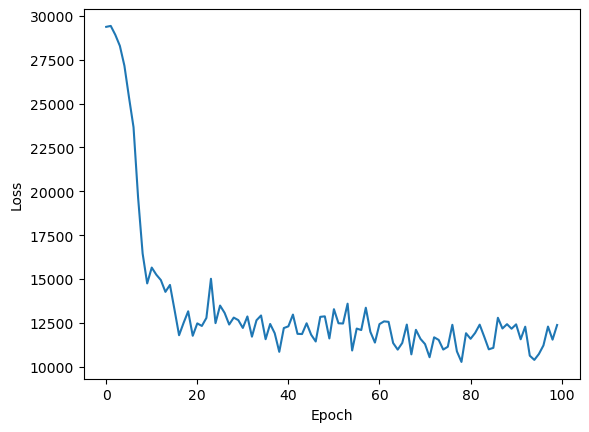

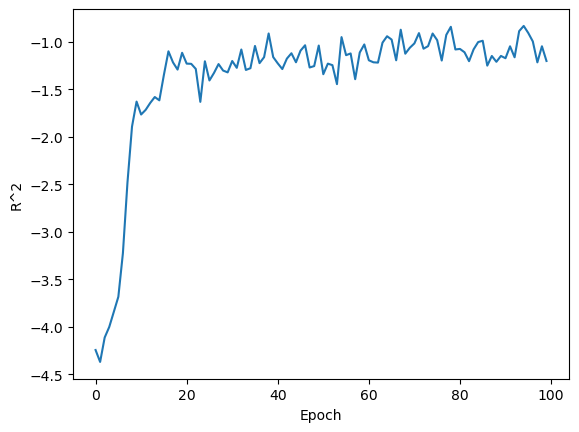

['age', 'bmi', 'sex']
[196.8785587831738, 170.70152460035138, 91.55583552165275]


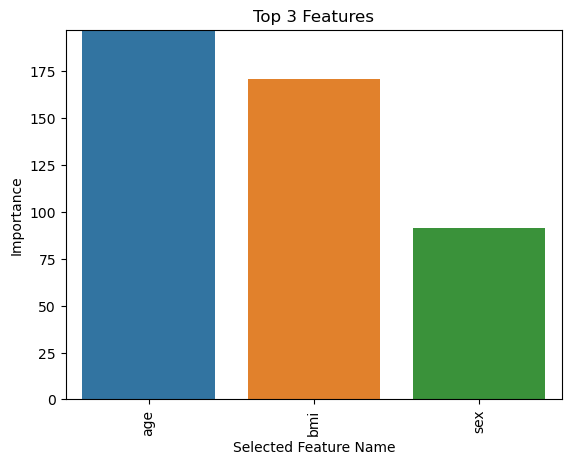

-0.5944511890411377
{'learning_rate': 0.00033287612473189475, 'hidden_size': 6, 'weight_decay': 0.025822112257696133}
RSS: -4.030953884124756
TSS: -4.030953884124756
R2: -4.030953884124756
RSS: -4.616568088531494
TSS: -4.616568088531494
R2: -4.616568088531494
RSS: -3.803703784942627
TSS: -3.803703784942627
R2: -3.803703784942627
87586.083984375 -12.451225757598877
RSS: -4.152402400970459
TSS: -4.152402400970459
R2: -4.152402400970459
RSS: -4.1251702308654785
TSS: -4.1251702308654785
R2: -4.1251702308654785
RSS: -4.120416641235352
TSS: -4.120416641235352
R2: -4.120416641235352
86790.42578125 -12.397989273071289
RSS: -4.0678558349609375
TSS: -4.0678558349609375
R2: -4.0678558349609375
RSS: -4.027707099914551
TSS: -4.027707099914551
R2: -4.027707099914551
RSS: -4.223598003387451
TSS: -4.223598003387451
R2: -4.223598003387451
87057.56640625 -12.31916093826294
RSS: -3.478909492492676
TSS: -3.478909492492676
R2: -3.478909492492676
RSS: -4.1272969245910645
TSS: -4.1272969245910645
R2: -4.1272

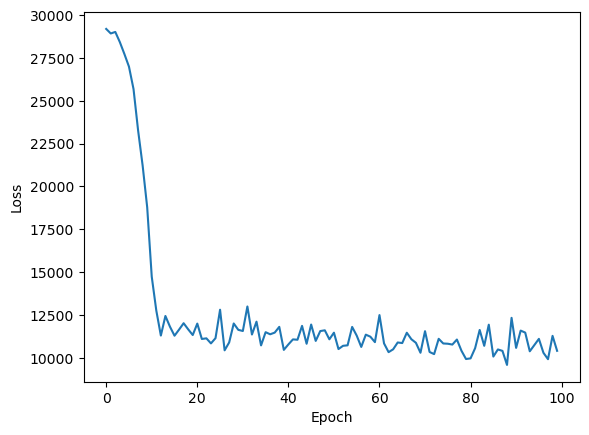

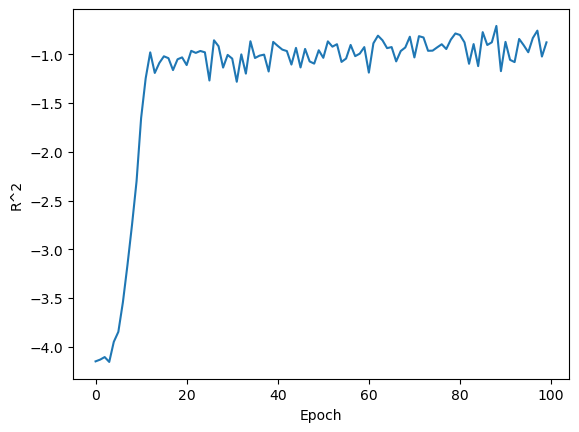

['age', 'bmi', 'sex']
[196.8785587831738, 170.70152460035138, 91.55583552165275]


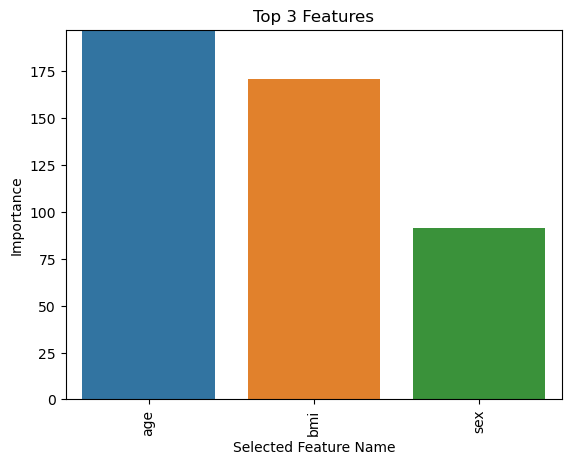

-0.7392325401306152
{'learning_rate': 0.0005513122763009041, 'hidden_size': 4, 'weight_decay': 0.9835357343279193}
RSS: -4.3929009437561035
TSS: -4.3929009437561035
R2: -4.3929009437561035
RSS: -4.581843376159668
TSS: -4.581843376159668
R2: -4.581843376159668
RSS: -3.608433723449707
TSS: -3.608433723449707
R2: -3.608433723449707
86890.98046875 -12.583178043365479
RSS: -4.667679309844971
TSS: -4.667679309844971
R2: -4.667679309844971
RSS: -3.8294711112976074
TSS: -3.8294711112976074
R2: -3.8294711112976074
RSS: -3.999579906463623
TSS: -3.999579906463623
R2: -3.999579906463623
87474.828125 -12.496730327606201
RSS: -4.271263599395752
TSS: -4.271263599395752
R2: -4.271263599395752
RSS: -3.852278232574463
TSS: -3.852278232574463
R2: -3.852278232574463
RSS: -4.514102458953857
TSS: -4.514102458953857
R2: -4.514102458953857
88266.0390625 -12.637644290924072
RSS: -3.601724147796631
TSS: -3.601724147796631
R2: -3.601724147796631
RSS: -4.716996669769287
TSS: -4.716996669769287
R2: -4.716996669769

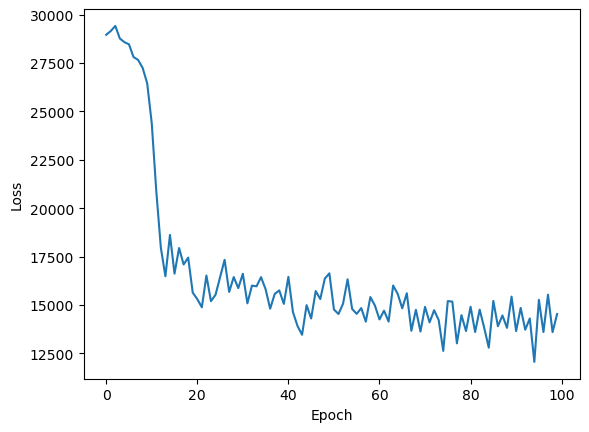

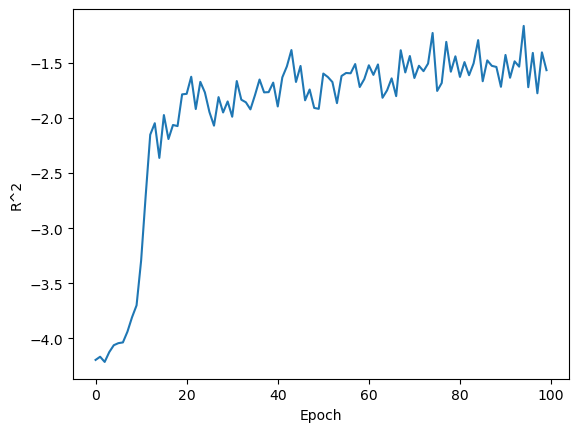

['age', 'bmi', 'sex']
[196.8785587831738, 170.70152460035138, 91.55583552165275]


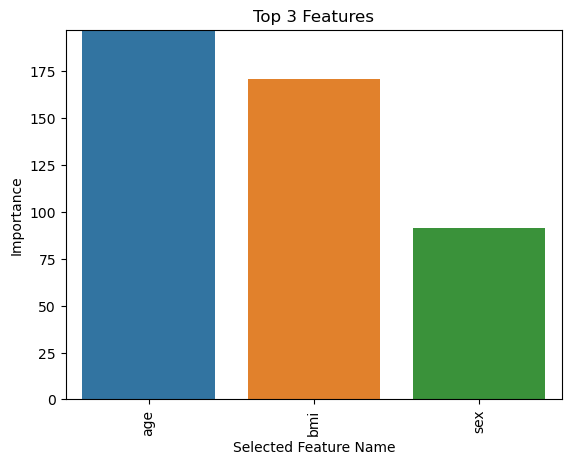

-0.5131123065948486
Best model:
  Loss:  9585.0517578125
  R^2:  -0.5131123065948486


In [61]:
from sklearn.datasets import load_diabetes

X,y = load_diabetes(return_X_y=True,as_frame=True)

main(X,y,3,3)
